In [36]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [37]:
from dependencies.collection import fetch_stock_data

In [38]:
sym="MSFT"
start="2004-01-01"
end="2024-12-31"
RFR = 0.03
df=fetch_stock_data(sym, start, end)
df.head(5)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-01-02,27.580000,27.770000,27.330000,27.450001,17.105963,44487700
2004-01-05,27.730000,28.180000,27.719999,28.139999,17.535948,67333700
2004-01-06,28.190001,28.280001,28.070000,28.240000,17.598257,46950800
2004-01-07,28.170000,28.309999,28.010000,28.209999,17.579563,54298200
2004-01-08,28.389999,28.480000,28.000000,28.160000,17.548409,58810800


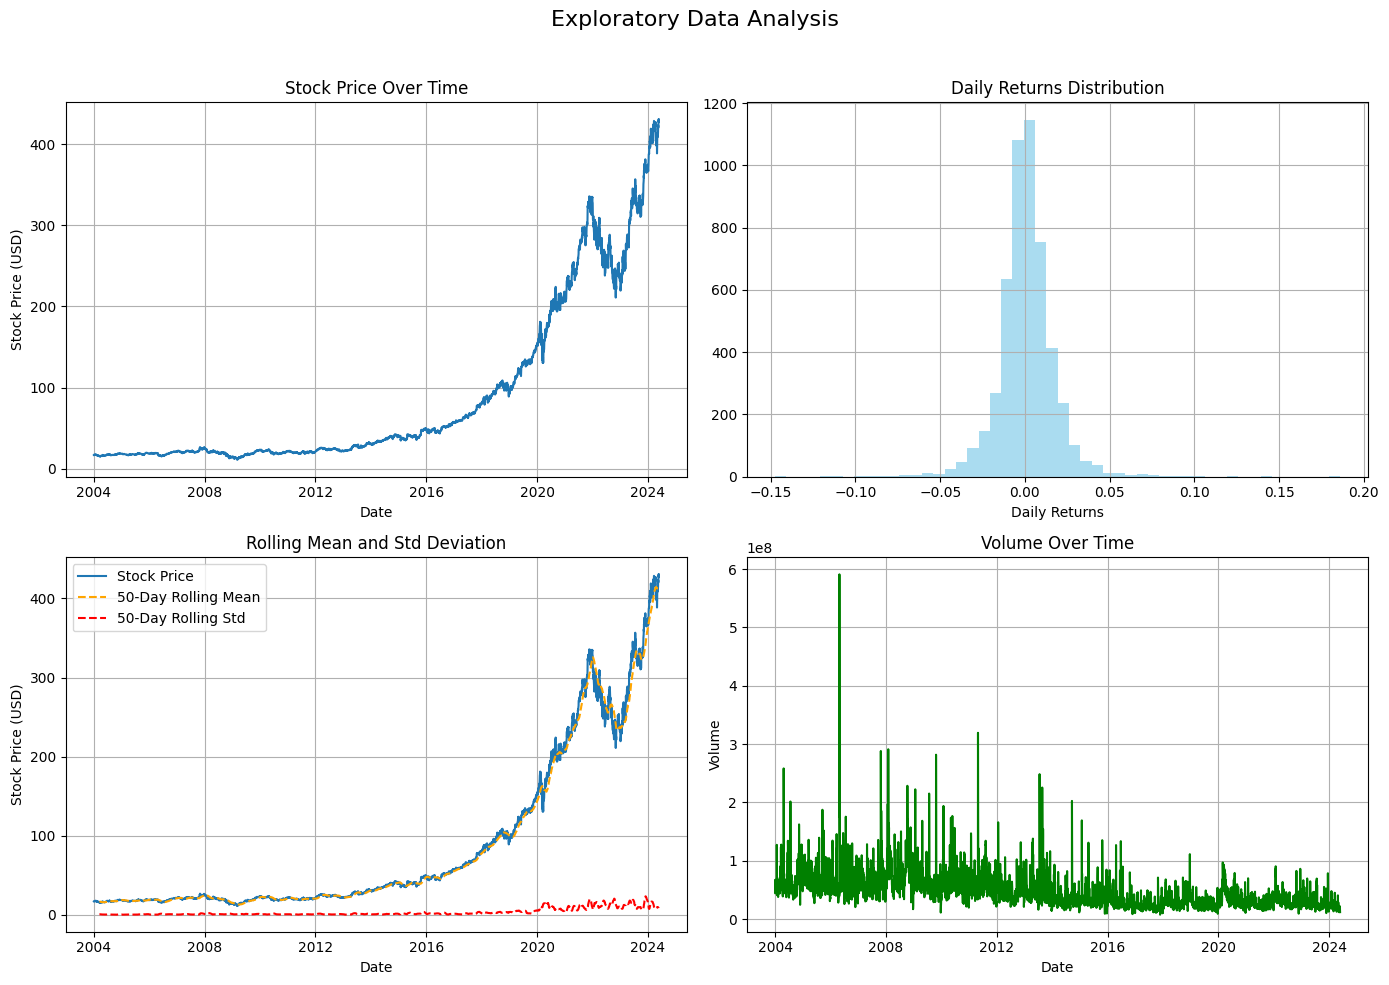

In [39]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Exploratory Data Analysis", fontsize=16)

# Plot 1: Stock Price Over Time
axes[0, 0].plot(df['Adj Close'])
axes[0, 0].set_title("Stock Price Over Time")
axes[0, 0].set_xlabel("Date")
axes[0, 0].set_ylabel("Stock Price (USD)")
axes[0, 0].grid(True)

# Plot 2: Daily Returns Distribution
axes[0, 1].hist(df['Adj Close'].pct_change().dropna(), bins=50, color='skyblue', alpha=0.7)
axes[0, 1].set_title("Daily Returns Distribution")
axes[0, 1].set_xlabel("Daily Returns")
axes[0, 1].grid(True)

# Plot 3: Rolling Mean and Standard Deviation
axes[1, 0].plot(df['Adj Close'], label='Stock Price')
axes[1, 0].plot(df['Adj Close'].rolling(window=50).mean(), label='50-Day Rolling Mean', linestyle='--', color='orange')
axes[1, 0].plot(df['Adj Close'].rolling(window=50).std(), label='50-Day Rolling Std', linestyle='--', color='red')
axes[1, 0].set_title("Rolling Mean and Std Deviation")
axes[1, 0].set_xlabel("Date")
axes[1, 0].set_ylabel("Stock Price (USD)")
axes[1, 0].legend()
axes[1, 0].grid(True)

# Plot 4: Volume Over Time
axes[1, 1].plot(df['Volume'], color='green')
axes[1, 1].set_title("Volume Over Time")
axes[1, 1].set_xlabel("Date")
axes[1, 1].set_ylabel("Volume")
axes[1, 1].grid(True)

# Adjust spacing between subplots
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()